<a href="https://colab.research.google.com/github/rohit-kukreja/rohit_INFO4670_Spring2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [23]:
from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [20]:
import pandas as pd

# Load the dataset
# Make sure the filename matches exactly what you uploaded
df = pd.read_csv('Assignment 2 dataset.csv')

# Look at the first 5 rows to make sure it loaded correctly
print(df.head())

# Get basic information about columns and missing values
print(df.info())



   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4 

* Balanced between "organic" and "conventional"
* There's some bias because 2018 has way less data than 2015-2017.
* There's also 1 data entry error with 1 row saying 1904.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

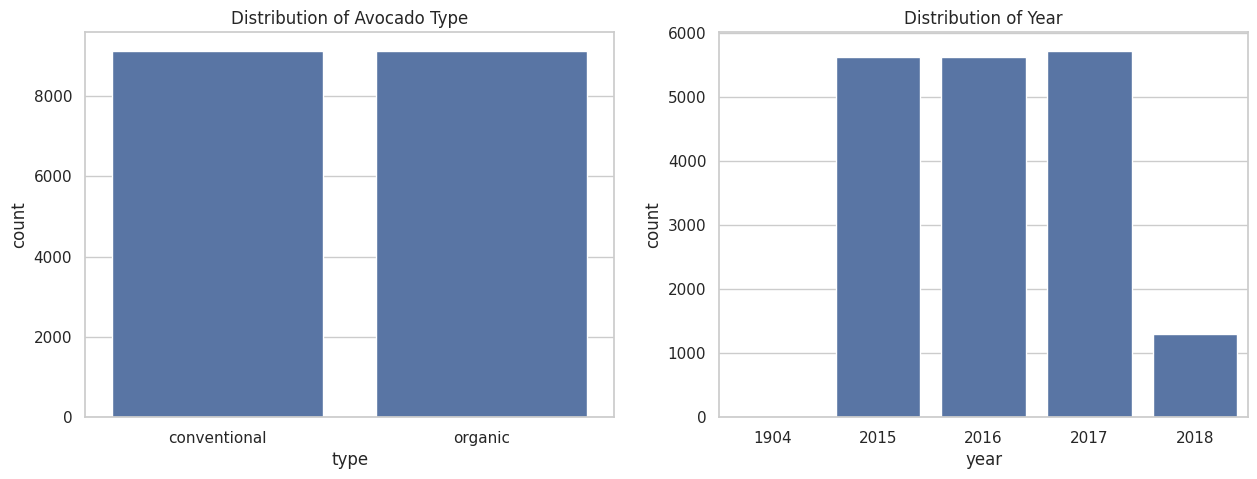

region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
BuffaloRochester       338
LasVegas               338
LosAngeles             338
MiamiFtLauderdale      338
Louisville             338
Nashville              338
NewOrleansMobile       338
NewYork                338
Midsouth               338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Check distribution of 'type'
sns.countplot(x='type', data=df, ax=axes[0])
axes[0].set_title('Distribution of Avocado Type')

# Check distribution of 'year'
sns.countplot(x='year', data=df, ax=axes[1])
axes[1].set_title('Distribution of Year')

plt.show()

# Since there are many regions, it's better to print the counts
print(df['region'].value_counts())

*   0 duplicate rows
*   Only 1 or 2 scattered columns like Total Volume,4046, and type.
* The data is clean in the case for volume, it does need some minor cleaning. The missing values can be replaced with the median so the entire rows don't have to be deleted.





1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [25]:
# Print the number of rows and columns
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")


The dataset has 18254 rows and 14 columns.


The data is sufficient because there's 18,000+ records and the sample size is large enough to be able to get trends, seasonal patterns, and regional differences. A thousand rows would be the "sweet spot" for standard classification and models would be able to learn effectively without needing a lot of computing power.

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [26]:
# Remove the first column "Column 1"
df.drop('Column 1', axis=1, inplace=True, errors='ignore')

# Treat the 'year' variable as nominal (categorical)
df['year'] = df['year'].astype('category')

# Display the first few rows and types to confirm
print(df.dtypes)
df.head()

Date              object
AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type              object
year            category
region            object
dtype: object


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2.2 Check for duplicate values and remove them.

In [27]:
# Check for and remove duplicate rows
before_count = len(df)
df.drop_duplicates(inplace=True)
after_count = len(df)

print(f"Removed {before_count - after_count} duplicate rows.")

Removed 2 duplicate rows.


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [28]:
# 1. Identify and drop rows with too many missing values
# (Row 18252 has 9 missing values, so we drop it)
df = df.dropna(thresh=10).copy()

# 2. Fill remaining missing values with the median of their specific Region
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    # We use .loc to avoid the SettingWithCopyWarning
    df.loc[:, col] = df[col].fillna(df.groupby('region')[col].transform('median'))

# Verify no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


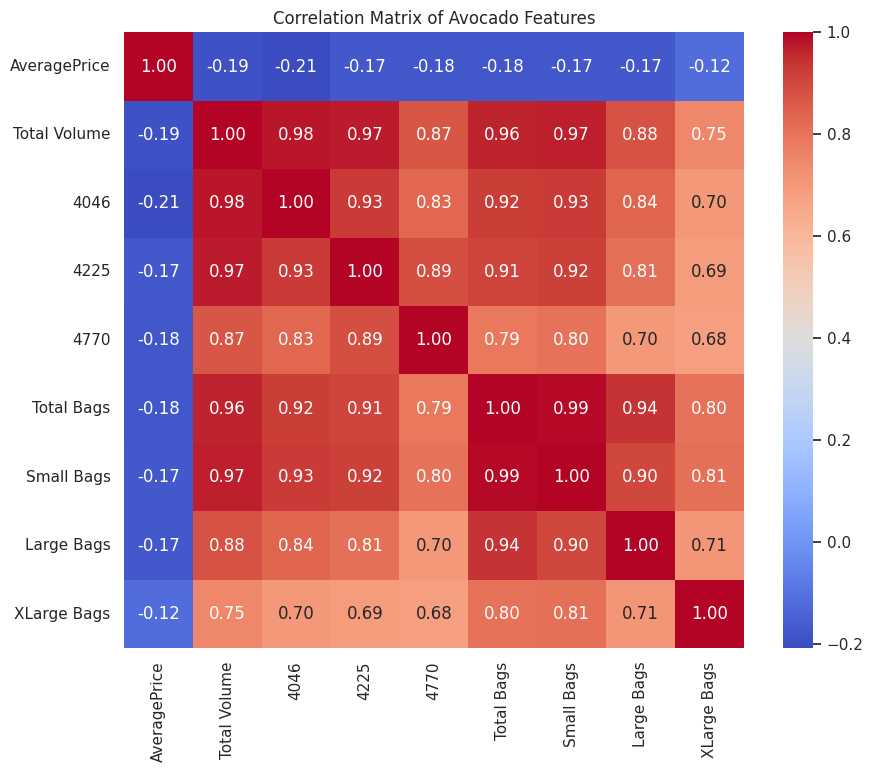

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Avocado Features")
plt.show()

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [15]:
# Report statistics for continuous variables
continuous_stats = df.describe().T[['min', 'max', 'mean', '50%']]
continuous_stats.columns = ['Min', 'Max', 'Mean', 'Median']
print("--- Statistics for Continuous Variables ---")
print(continuous_stats)

# List unique values for categorical variables
print("\n--- Unique Values for Categorical Variables ---")
print(f"Types: {df['type'].unique()}")
print(f"Years: {df['year'].unique()}")
print(f"Number of Unique Regions: {df['region'].nunique()}")

--- Statistics for Continuous Variables ---
                Min          Max           Mean     Median
AveragePrice   0.44         3.25       1.406020       1.37
Total Volume  84.56  62505646.52  850552.312103  107354.25
4046           0.00  22743616.17  292983.953737    8645.30
4225           0.00  20470572.61  295122.546831   29056.73
4770           0.00   2546439.11   22837.273030     184.99
Total Bags     0.00  19373134.37  239613.964021   39738.53
Small Bags     0.00  13384586.80  182178.418161   26362.82
Large Bags     0.00   5719096.61   54332.331965    2647.71
XLarge Bags    0.00    551693.65    3106.086096       0.00

--- Unique Values for Categorical Variables ---
Types: ['conventional' 'organic']
Years: [2015, 2016, 2017, 2018, 1904]
Categories (5, int64): [1904, 2015, 2016, 2017, 2018]
Number of Unique Regions: 54


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [17]:
# Convert Date to datetime format if you haven't yet
df['Date'] = pd.to_datetime(df['Date'])

# Find the earliest date
earliest_date = df['Date'].min()
print(f"The earliest recorded date is: {earliest_date}")

# Check for data before 2010
pre_2010 = df[df['Date'].dt.year < 2010]
print(f"\nNumber of records before 2010: {len(pre_2010)}")
print(pre_2010)

The earliest recorded date is: 1904-01-21 00:00:00

Number of records before 2010: 1
            Date  AveragePrice  Total Volume     4046     4225    4770  \
18250 1904-01-21          1.87      13766.76  1191.92  2452.79  727.94   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18250     9394.11      9351.8       42.31          0.0  organic  1904   

                 region  
18250  WestTexNewMexico  


Not reasonable, there might be a data entry error for 2018. The commercial in that specific format didn't exist in 1904. I'd remove the point since it's an outlier and can mess with the time-series analysis.

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [18]:
max_price_row = df.loc[df['AveragePrice'].idxmax()]
print(f"Highest Price: ${max_price_row['AveragePrice']}")
print(f"Region: {max_price_row['region']}")

Highest Price: $3.25
Region: SanFrancisco


I took the AveragePrice data and used idxmax() to locate where the biggest price was, then I grabbed the area and that price point.

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [19]:
max_vol_row = df.loc[df['Total Volume'].idxmax()]
print(f"Highest Total Volume: {max_vol_row['Total Volume']:,}")
print(f"Region: {max_vol_row['region']}")

Highest Total Volume: 62,505,646.52
Region: TotalUS


The highest volume is 62,505,646 in the TotalUS region. I found the biggest number in the Total Volume column with idxmax(), and put it in the correct region.